<p style="text-align:center;">
    <img src='../utils/digrams/eda_digram.png' width="1000">
</p>

# NYC Trip Duration

This EDA for ***New York City Taxi Trip Duration*** project inspired by kaggle project to calculate the total duration for taxi driving in New York  
  
  
  
* from Kaggle  

***id*** - a unique identifier for each trip
  
***vendor_id*** - a code indicating the provider associated with the trip record  

***dropoff_datetime*** - date and time when the meter was disengaged  

***passenger_count*** - the number of passengers in the vehicle (driver entered value)  

***pickup_longitude*** - the longitude where the meter was engaged  

***pickup_latitude*** - the latitude where the meter was engaged  

***dropoff_longitude*** - the longitude where the meter was disengaged  

***dropoff_latitude*** - the latitude where the meter was disengaged  

***store_and_fwd_flag*** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip  

***trip_duration*** - duration of the trip in seconds

## Exploration

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/splits/split/train.csv')
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1000000 non-null  object 
 1   vendor_id           1000000 non-null  int64  
 2   pickup_datetime     1000000 non-null  object 
 3   passenger_count     1000000 non-null  int64  
 4   pickup_longitude    1000000 non-null  float64
 5   pickup_latitude     1000000 non-null  float64
 6   dropoff_longitude   1000000 non-null  float64
 7   dropoff_latitude    1000000 non-null  float64
 8   store_and_fwd_flag  1000000 non-null  object 
 9   trip_duration       1000000 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 76.3+ MB


In [5]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06
mean,1.534793,1.665353,-73.973475,40.750947,-73.973421,40.751829,9.548850e+02
std,0.498788,1.315723,0.065404,0.033745,0.065432,0.035782,3.882070e+03
min,1.000000,0.000000,-121.933342,34.359695,-121.933304,34.359695,1.000000e+00
25%,1.000000,1.000000,-73.991852,40.737372,-73.991341,40.735928,3.970000e+02
50%,2.000000,1.000000,-73.981728,40.754131,-73.979767,40.754551,6.620000e+02
75%,2.000000,2.000000,-73.967346,40.768379,-73.963036,40.769833,1.074000e+03
max,2.000000,7.000000,-61.335529,51.881084,-61.335529,43.921028,2.227612e+06


### Check missing

In [6]:
df.isna().sum().sum()

0

### Check Dublicates

In [7]:
df.duplicated().sum()

0

### Check Outlier

In [8]:
feats = df.select_dtypes(np.number).columns

for feat in feats:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3-q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    mask = df[ (df[feat] < lower)  | (df[feat] > upper) ]
    if not mask.empty:
        print(f'{feat} has outlier {len(mask)}')



passenger_count has outlier 106415
pickup_longitude has outlier 57641
pickup_latitude has outlier 36147
dropoff_longitude has outlier 53656
dropoff_latitude has outlier 49190
trip_duration has outlier 50939


In [9]:
print(df.shape)

for feat in feats:
    q1 = df[feat].quantile(0.25)
    q3 = df[feat].quantile(0.75)
    iqr = q3-q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[feat] = np.clip(df[feat], lower, upper)


(1000000, 10)


## EDA

In [10]:
def info(col):
    print("min", df[col].min())
    print("max", df[col].max())
    print("STD", df[col].std())
    print("Skewness", df[col].skew())
    len_unique = len(df[col].value_counts())
    print(f'Unique value counts: {len_unique}')
    if len_unique < 12:
        print(df[col].value_counts())


In [11]:
def group_by(col, fun):
    group_fun = df.groupby(col)["trip_duration"].agg(fun).reset_index()
    return group_fun

### Trip Duration Analysis

In [12]:
Y = df.iloc[:, -1]
Y

0         1040.0
1          827.0
2          614.0
3          867.0
4         2089.5
           ...  
999995     254.0
999996     434.0
999997    1306.0
999998    2089.5
999999    1207.0
Name: trip_duration, Length: 1000000, dtype: float64

In [13]:
info("trip_duration")


min 1.0
max 2089.5
STD 528.4156356643408
Skewness 0.9662751632353926
Unique value counts: 2090


In [14]:
df["log_trip_duration"] = np.log(Y)
info("log_trip_duration")

min 0.0
max 7.64468008188797
STD 0.7525416761244124
Skewness -0.8988031340683115
Unique value counts: 2090


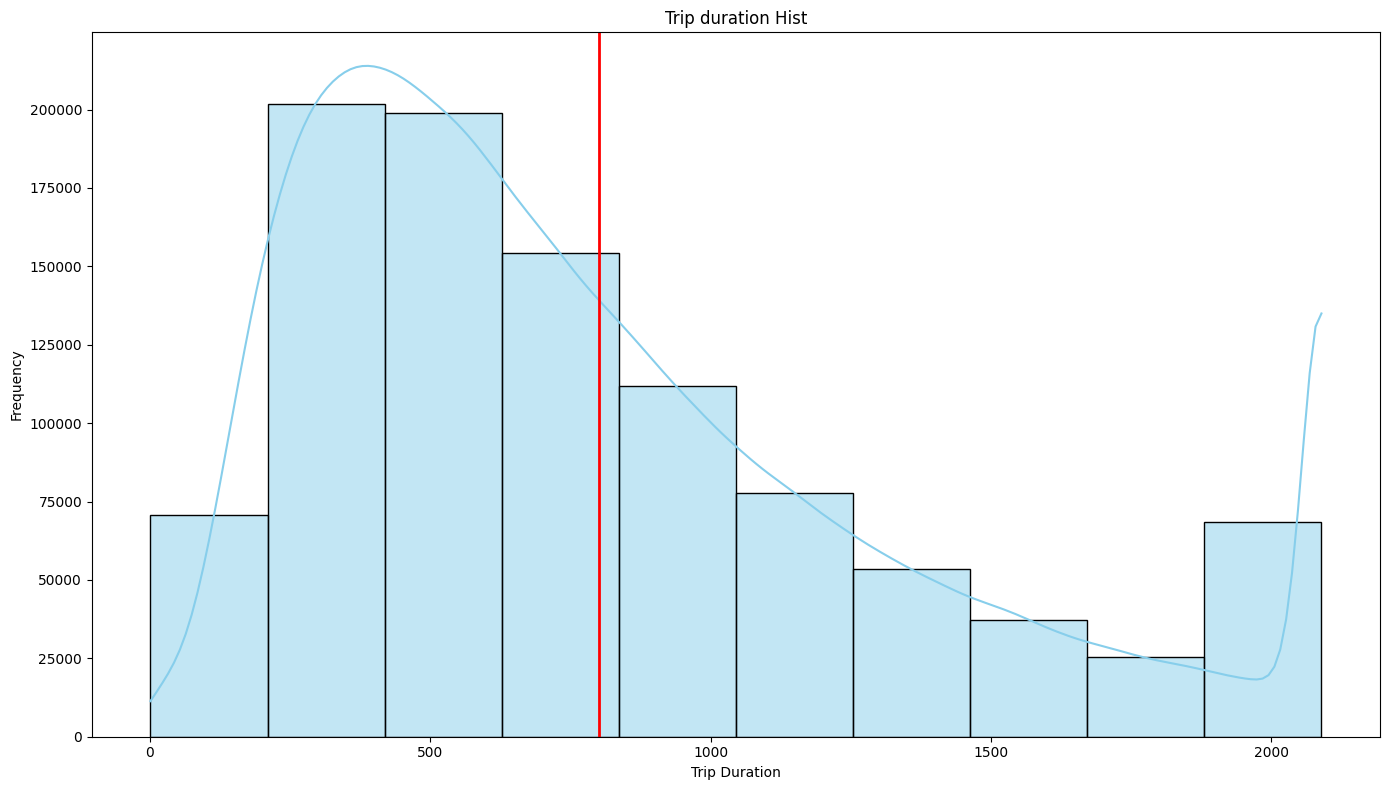

In [15]:
plt.figure(figsize=(14,8))

sns.histplot(Y, kde=True, bins=10, color="skyblue", edgecolor="black")
plt.axvline(Y.mean(), color="red", linewidth=2, label='Mean')


plt.title("Trip duration Hist")
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Numerical Analysis

In [16]:
num_feats = df.select_dtypes(np.number).columns
num_feats

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'log_trip_duration'],
      dtype='object')

#### Vendor Id analysis

In [17]:
info("vendor_id")

min 1
max 2
STD 0.498788227548221
Skewness -0.1395103880344715
Unique value counts: 2
vendor_id
2    534793
1    465207
Name: count, dtype: int64


In [18]:
sum_vendor_group = group_by("vendor_id", 'count')
sum_vendor_group.sort_values(by="trip_duration", ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,vendor_id,trip_duration
0,2,534793
1,1,465207


#### passenger_count

In [19]:
info('passenger_count')

min 0.0
max 3.5
STD 0.8550391010132896
Skewness 1.4984816879956708
Unique value counts: 5
passenger_count
1.0    708628
2.0    143907
3.5    106415
3.0     41012
0.0        38
Name: count, dtype: int64


In [20]:
total_ride_duration_passengers = group_by('passenger_count', 'sum')
total_ride_duration_passengers.sort_values(by="trip_duration", ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,passenger_count,trip_duration
0,1.000000,560024903.500000
1,2.000000,119775422.500000
2,3.500000,86523150.000000
3,3.000000,33891800.000000
4,0.000000,6920.500000


C:\Users\pc\AppData\Local\Temp\ipykernel_9832\406933172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sum_vendor_group, x="vendor_id", y="trip_duration", palette="Reds", ax=axes[0])
C:\Users\pc\AppData\Local\Temp\ipykernel_9832\406933172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_ride_duration_passengers, x="passenger_count", y="trip_duration", palette="Reds", ax=axes[1])


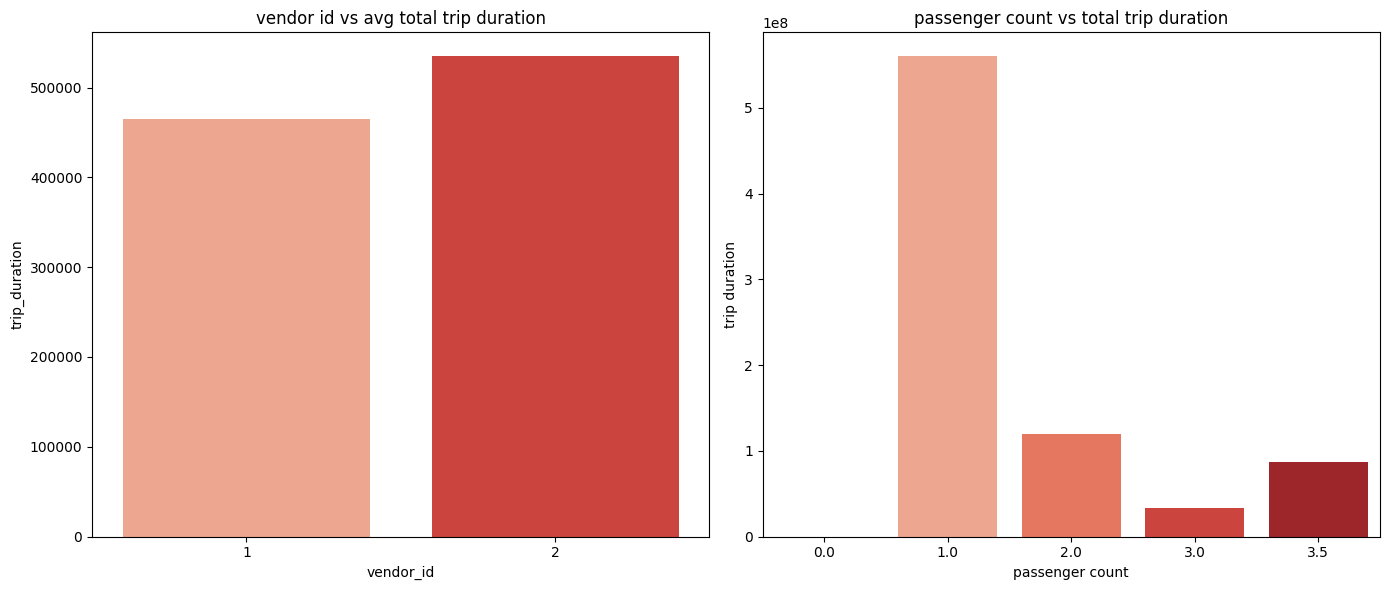

In [21]:
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.barplot(data=sum_vendor_group, x="vendor_id", y="trip_duration", palette="Reds", ax=axes[0])
axes[0].set_title("vendor id vs avg total trip duration")
axes[0].set_xlabel("vendor_id")
axes[0].set_ylabel("trip_duration")

sns.barplot(data=total_ride_duration_passengers, x="passenger_count", y="trip_duration", palette="Reds", ax=axes[1])
axes[1].set_title("passenger count vs total trip duration")
axes[1].set_xlabel("passenger count")
axes[1].set_ylabel("trip duration")

plt.tight_layout()
plt.show()

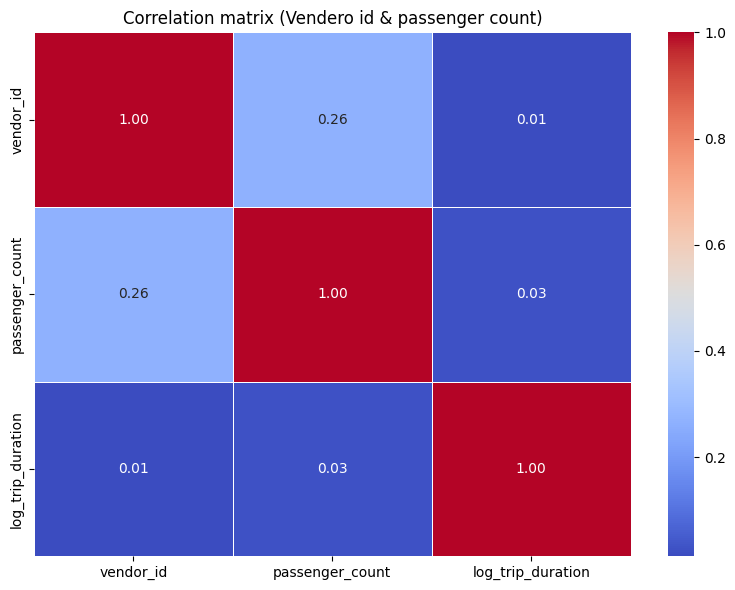

In [22]:
feats = df[["vendor_id", "passenger_count", "log_trip_duration"]]

corr_matrix = feats.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix (Vendero id & passenger count)")
plt.tight_layout()
plt.show()

#### Longitude & Latitude analysis

In [23]:
feats = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

In [24]:
for feat in feats:
    print('-'*10, feat, '-'*10)
    info(feat)

---------- pickup_longitude ----------
min -74.02861022949219
max -73.93058776855469
STD 0.019911562111986504
Skewness 0.6598722865138451
Unique value counts: 11493
---------- pickup_latitude ----------
min 40.690862178802504
max 40.81488943099974
STD 0.024250863071563895
Skewness -0.3265716639413646
Unique value counts: 31167
---------- dropoff_longitude ----------
min -74.03379821777341
max -73.92057800292972
STD 0.022416695851162592
Skewness 0.6845382761752649
Unique value counts: 13643
---------- dropoff_latitude ----------
min 40.6850700378418
max 40.8206901550293
STD 0.02807614453717583
Skewness -0.22000037015367377
Unique value counts: 34946


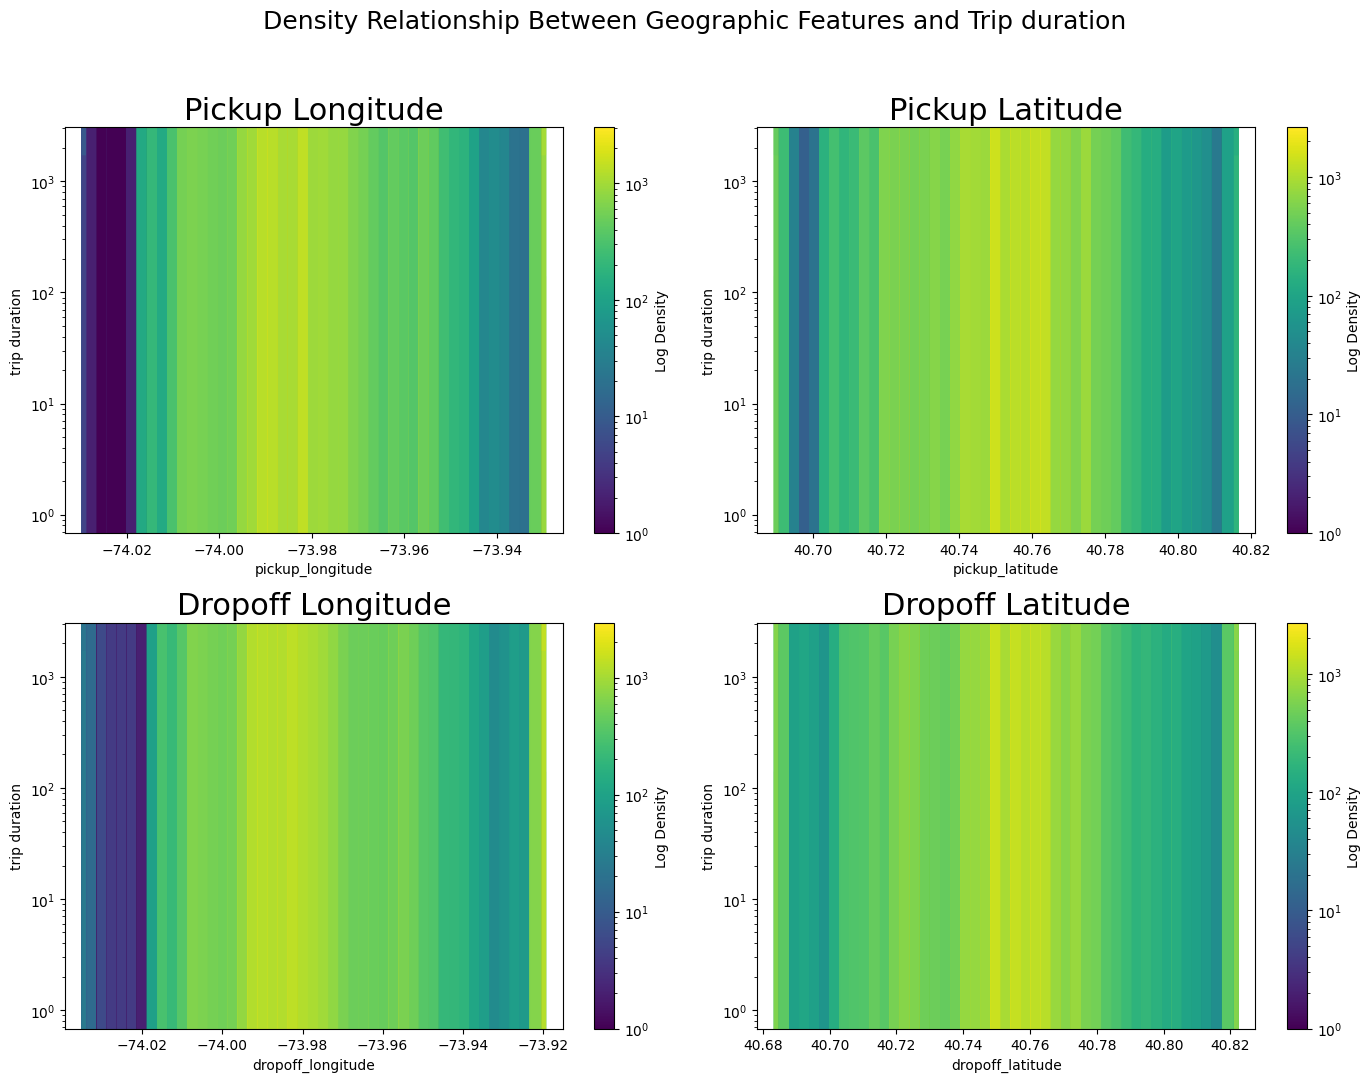

In [25]:

y = df['trip_duration']
y_clip = y[y < y.quantile(0.99)]

plt.figure(figsize=(14,11))

for i in range(4):
    ax = plt.subplot(2,2, i+1)
    hb = ax.hexbin(
        df.loc[y_clip.index, feats[i]],
        y_clip,
        gridsize=45,
        bins='log',
        mincnt=1
    )

    ax.set_title(feats[i].replace('_', " ").title(), fontsize=22)
    ax.set_xlabel(feats[i])
    ax.set_ylabel('trip duration')
    ax.set_yscale('log')

    cb = plt.colorbar(hb, ax=ax)
    cb.set_label('Log Density')


plt.suptitle('Density Relationship Between Geographic Features and Trip duration', fontsize=18)

plt.tight_layout(rect=[0,0, 1, 0.95])
plt.show()


In [26]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1, lat2, lon2])
    dlat = lat2-lat1
    dlon = lon2-lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2) * (np.sin(dlon/2)**2)

    d = 2*R*np.arcsin(np.sqrt(a))
    return d

df['haversine_distance'] = haversine(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])
df['haversine_distance'].head()



0    2.763050
1    1.959178
2    1.404772
3    1.978660
4    8.972391
Name: haversine_distance, dtype: float64

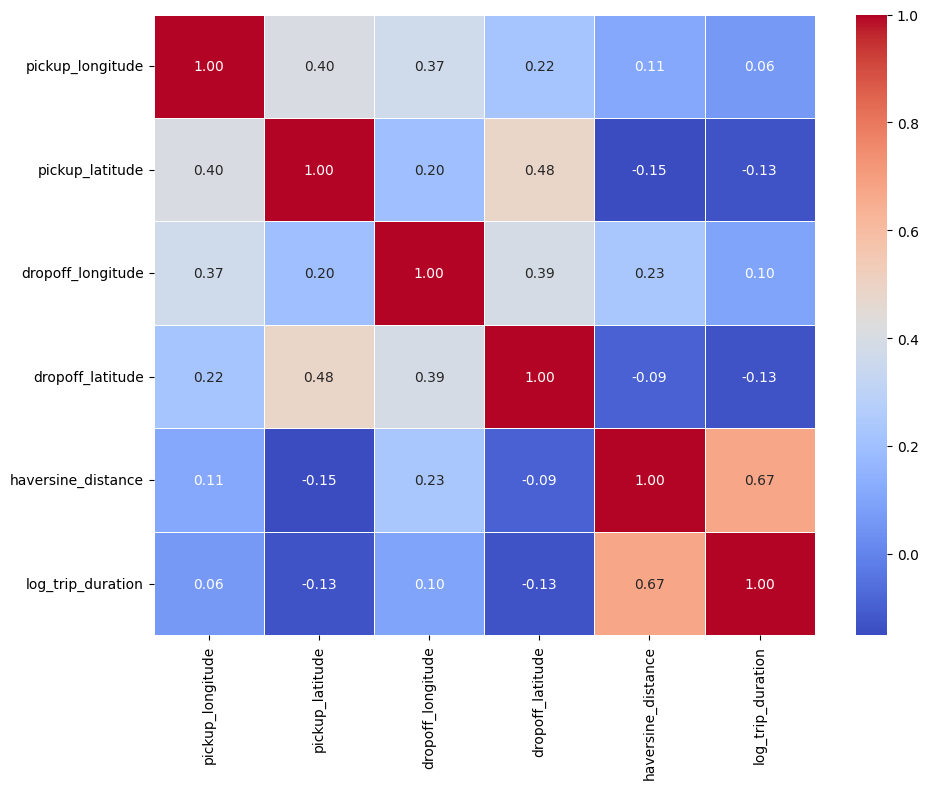

In [27]:
matrix = df[["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", 'haversine_distance', 'log_trip_duration']]

corr_matrix = matrix.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.tight_layout()
plt.show()


### Categorical Analysis

#### Store and fwd flag

In [28]:
df['store_and_fwd_flag']

0         N
1         N
2         N
3         N
4         N
         ..
999995    N
999996    N
999997    N
999998    N
999999    N
Name: store_and_fwd_flag, Length: 1000000, dtype: object

In [29]:
from sklearn.preprocessing import LabelEncoder

feat = 'store_and_fwd_flag'

le = LabelEncoder()
df[feat] = le.fit_transform(df[feat])
df[feat].head()


0    0
1    0
2    0
3    0
4    0
Name: store_and_fwd_flag, dtype: int32

In [30]:
info('store_and_fwd_flag')

min 0
max 1
STD 0.07433791278429383
Skewness 13.302606176815996
Unique value counts: 2
store_and_fwd_flag
0    994443
1      5557
Name: count, dtype: int64


In [33]:
store_fwd_group = group_by('store_and_fwd_flag', 'sum')
store_fwd_group.sort_values(by="trip_duration", ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,store_and_fwd_flag,trip_duration
0,0,794875464.500000
1,1,5346732.000000


#### pickup datetime

In [39]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
print(df['pickup_datetime'].dtype)

datetime64[ns]


In [44]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.day_of_week
df['hour'] = df['pickup_datetime'].dt.hour
df['day_name'] = df['pickup_datetime'].dt.day_name()
print(df[['year','month', 'day_of_week', 'hour', 'day_name']].head(10))

   year  month  day_of_week  hour   day_name
0  2016      6            2     7  Wednesday
1  2016      4            6    12     Sunday
2  2016      6            6     2     Sunday
3  2016      5            3    17   Thursday
4  2016      5            3    17   Thursday
5  2016      4            3    12   Thursday
6  2016      3            3    21   Thursday
7  2016      2            4     6     Friday
8  2016      3            1    14    Tuesday
9  2016      3            1    23    Tuesday


In [53]:
most_day_ride_duration = group_by('day_name', 'sum')
most_day_ride_duration.sort_values(by="trip_duration", ascending=False).head(2).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,day_name,trip_duration
0,Thursday,127101958.000000
1,Friday,125915386.000000


In [54]:
most_hour_ride_duration = group_by('hour', 'sum')
most_hour_ride_duration.sort_values(by="trip_duration", ascending=False).head(2).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,hour,trip_duration
0,18,50880892.000000
1,19,47556957.000000


In [57]:
def getseason(month):
    if   4<= month <=7:
        return "Sprint"
    elif 8 <= month <= 10:
        return "Summar"
    elif  11<= month >=12:
        return "Fall"
    else:
        return "Winter"
    

df["season"] = df['pickup_datetime'].dt.month.apply(getseason)
df['season'].value_counts()

season
Sprint    502905
Winter    497095
Name: count, dtype: int64

In [59]:
dt_df = df[['year', 'month', 'day_of_week', 'hour', 'season']]
dt_df.head()

,year,month,day_of_week,hour,season
0,2016,6,2,7,Sprint
1,2016,4,6,12,Sprint
2,2016,6,6,2,Sprint
3,2016,5,3,17,Sprint
4,2016,5,3,17,Sprint


In [61]:
from sklearn.preprocessing import LabelEncoder

feat = 'season'

le = LabelEncoder()

df['season_encoder'] = le.fit_transform(df[feat])
df['season_encoder'].value_counts()

season_encoder
0    502905
1    497095
Name: count, dtype: int64

In [67]:
df.drop('season', axis=1, inplace=True)

In [64]:
df.drop('year', axis=1, inplace=True)

In [65]:
info('month')

min 1
max 6
STD 1.6811714703314808
Skewness -0.013338705121671228
Unique value counts: 6
month
3    175745
4    172014
5    170499
2    163721
6    160392
1    157629
Name: count, dtype: int64


In [66]:
month_sum_group = group_by('month', 'sum')
month_sum_group.sort_values(by="trip_duration", ascending=False).reset_index(drop=True).style.background_gradient(cmap="Reds", subset=['trip_duration'])

,month,trip_duration
0,5,142210901.000000
1,4,139624394.500000
2,3,138225518.500000
3,6,134431371.500000
4,2,125543064.500000
5,1,120186946.500000


In [69]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'haversine_distance', 'month', 'day_of_week',
       'hour', 'day_name', 'season_encoder'],
      dtype='object')

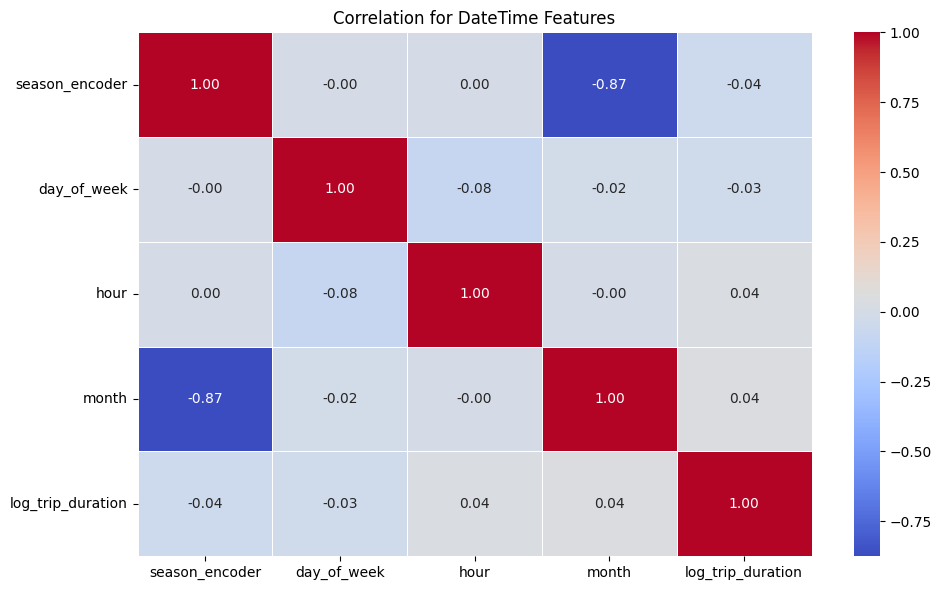

In [75]:
dt_df = df[['season_encoder', 'day_of_week', 'hour', 'month', 'log_trip_duration']]

corr_matrix = dt_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation for DateTime Features')
plt.tight_layout()
plt.show()

In [78]:
df.drop('id', axis=1, inplace=True )

In [80]:
df.drop('day_name', axis=1, inplace=True )

In [82]:
df.drop('log_trip_duration', axis=1, inplace=True )

In [87]:
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,haversine_distance,month,day_of_week,hour,season_encoder
0,2,2016-06-08 07:36:19,1.0,-73.985611,40.735943,-73.980331,40.760468,0,1040.0,2.763050,6,2,7,0
1,2,2016-04-03 12:58:11,1.0,-73.978394,40.764351,-73.991623,40.749859,0,827.0,1.959178,4,6,12,0
2,2,2016-06-05 02:49:13,3.5,-73.989059,40.744389,-73.973381,40.748692,0,614.0,1.404772,6,6,2,0
3,2,2016-05-05 17:18:27,2.0,-73.990326,40.731136,-73.991264,40.748917,0,867.0,1.978660,5,3,17,0
4,1,2016-05-12 17:43:38,3.5,-73.930588,40.690862,-73.987137,40.759232,0,2089.5,8.972391,5,3,17,0


In [92]:
corr_matrix = df.corr()

target_corr = corr_matrix.iloc[:,8].reset_index().sort_values(by='trip_duration', ascending=False)
print(target_corr.head(7), end='\n\n')
print(target_corr.tail(6))

                 index  trip_duration
8        trip_duration       1.000000
9   haversine_distance       0.749074
5    dropoff_longitude       0.154025
3     pickup_longitude       0.139826
1      pickup_datetime       0.056614
10               month       0.055318
12                hour       0.033022

               index  trip_duration
2    passenger_count       0.022589
0          vendor_id       0.010845
11       day_of_week      -0.032041
13    season_encoder      -0.052350
4    pickup_latitude      -0.153087
6   dropoff_latitude      -0.160357


### Conclusion 

- Original Dat contain 10 features
- drop `id` usless feature
- data are clean *** no missing & no dublicate ***
 From EDA
- Target (Trip Duration)
- - before remove outlier, very high variance, upnormal plotting
- - after remove outlier , the data in noramal range and almost guessian plot

- most of the passengers are 1 and 2 but there high outlier
- we calculate haversine distance from longitude&latitude and get very good correlation with target
- from datetime
- - Thursday and Friday are the most days that there are tips durtion
- - most of the trip duration are at 18 & 19 hour of the day
- - there is low correlation between datetime features and target
- - all data collected in `2016`, so we drop year feature
  
- the to 5 feature correlation with target are  
 `haversine_distnace`, `dropoff_longitude`, `pickup_longitude`, `dropoff_latitude`, `pickup_latitude`